# Problem 7.8

(i) In order to find the inverse we need to solve for $x$. Let $F(x) = y$
\begin{equation}
y = 1-e^{-\lambda x} \implies 1-y = e^{-\lambda x}\implies
\end{equation}
\begin{equation}
\ln(1 - y) = -\lambda x \implies -\frac{\ln(1 - y)}{\lambda} = x
\end{equation}
Which gives the result that
\begin{equation}
F^{-1}(y) =-\frac{\ln(1 - y)}{\lambda}
\end{equation}
(ii) Assume that $Y\sim \mbox{unifrom}(0,1)$ then we know it's pdf is

\begin{equation}
f_Y(y)
\begin{cases}
1 & y\in [0,1]\\
0 & y\not\in [0,1]
\end{cases}
\end{equation}

(iii) (below)

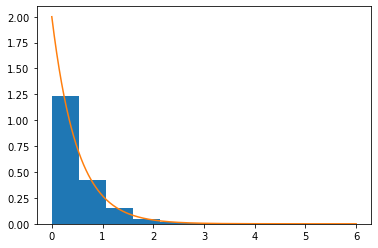

In [15]:
import numpy as np
from matplotlib import pyplot as plt


n = 10**5
pdf = lambda x: 2 * np.exp(-2 * x)
dom = np.linspace(0, 6, 500)

sample_u = -np.log(np.random.uniform(0, 1, n)) /2
fig, axs = plt.subplots(1, 1)

axs.hist(sample_u, density=True)
axs.plot(dom, pdf(dom))

plt.show()




# Problem 7.9

(i) 
\begin{equation}
y = \frac{1}{1+e^{-x}} \implies \frac{1}{y} = 1 + e^{-x} \implies \frac{1}{y} - 1 = e^{-x} \implies
\end{equation}
Which gives the inverse as
\begin{equation}
F^{-1}(y) = -(ln\frac{1}{y} - 1)
\end{equation}
(ii) and (iii) below

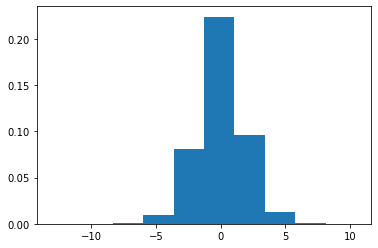

mean: 0.0008785286627205207
variance: 3.2840585413914076


In [21]:
sample = np.random.uniform(0,1, n)

logistic =  -1 *np.log((1/sample)-1)

plt.hist(logistic, density=True)
plt.show()

mean = (1/n) * sum(logistic)
variance = (1/(n-1)) * sum((logistic - mean)**2)

print('mean:', mean)
print('variance:', variance)


# Problem 7.10
the d dimensional unit ball is the points where $||\vec{x}||_2 \leq 1$ where $\vec{x}\in \mathbb{R}^n$